<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 2

### Exploratory Data Analysis (EDA)

---

Your hometown mayor just created a new data analysis team to give policy advice, and the administration recruited _you_ via LinkedIn to join it. Unfortunately, due to budget constraints, for now the "team" is just you...

The mayor wants to start a new initiative to move the needle on one of two separate issues: high school education outcomes, or drug abuse in the community.

Also unfortunately, that is the entirety of what you've been told. And the mayor just went on a lobbyist-funded fact-finding trip in the Bahamas. In the meantime, you got your hands on two national datasets: one on SAT scores by state, and one on drug use by age. Start exploring these to look for useful patterns and possible hypotheses!

---

This project is focused on exploratory data analysis, aka "EDA". EDA is an essential part of the data science analysis pipeline. Failure to perform EDA before modeling is almost guaranteed to lead to bad models and faulty conclusions. What you do in this project are good practices for all projects going forward, especially those after this course!

This lab includes a variety of plotting problems. Much of the plotting code will be left up to you to find either in the lesson notes, or if not there, online. There are massive amounts of code snippets either in documentation or sites like [Stack Overflow](https://stackoverflow.com/search?q=%5Bpython%5D+seaborn) that have almost certainly done what you are trying to do.

**Get used to googling for code!** You will use it every single day as a data scientist, especially for visualization and plotting.

#### Package imports

In [298]:
import numpy as np
import scipy.stats as stats
import csv
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# this line tells jupyter notebook to put the plots in the notebook rather than saving them to file
%matplotlib inline

# this line makes plots prettier on mac retina screens - if you don't have one it shouldn't do anything
%config InlineBackend.figure_format = 'retina'

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Load the `sat_scores.csv` dataset and describe it

---

You should replace the placeholder path to the `sat_scores.csv` dataset below with your specific path to the file.

### 1.1 Load the file with the `csv` module and put it in a Python dictionary

The dictionary format for data will be the column names as key, and the data under each column as the values.

Toy example:
```python
data = {
    'column1':[0,1,2,3],
    'column2':['a','b','c','d']
    }
```

In [299]:
# Loading the file with the csv module

sat_csv = "/Users/lewis/Desktop/GA/DSI25-lessons/projects/project-2/sat_scores.csv"

with open(sat_csv, mode='r') as csv_file:
    csv_reader = csv.reader(csv_file)
        
    # lists of column values, to be used as dict values
    state = []
    rate = []
    verbal = []
    math = []
    
    # skipping header/column name row
    next(csv_reader)

    # populating lists
    for line in csv_reader:
        state.append(line[0])
        rate.append(int(line[1]))
        verbal.append(int(line[2]))
        math.append(int(line[3]))

# building dict
sat_dict = {'state':state, 'rate':rate, 'verbal':verbal, 'math':math}

### 1.2 Make a pandas DataFrame object with the SAT dictionary, and another with the pandas `.read_csv()` function

Compare the DataFrames using the `.dtypes` attribute in the DataFrame objects. What is the difference between loading from file and inputting this dictionary (if any)?

In [300]:
# Making a DataFrame with sat_dict
sat_dict_to_df = pd.DataFrame(sat_dict)

In [301]:
# Making a DataFrame with pd.read_csv()
sat = pd.read_csv(sat_csv)
sat.columns = [col.lower() for col in sat.columns]

In [302]:
# Compare the DataFrames using the .dtypes attribute in the DataFrame objects.
sat_dict_to_df.dtypes

state     object
rate       int64
verbal     int64
math       int64
dtype: object

In [303]:
sat.dtypes

state     object
rate       int64
verbal     int64
math       int64
dtype: object

**Q:** What is the difference between loading from file and inputting this dictionary (if any)?

**A:** sat_dict_to_df's dtypes are the same as sat's, but only because I manually set them to be. If I did not convert the string column values to floats when creating the dictionary, the columns in the DataFrame would be of type `object` (i.e. strings). 

### 1.3 Look at the first ten rows of the DataFrame: what does our data describe?

From now on, use the DataFrame loaded from the file using the `.read_csv()` function.

Use the `.head(num)` built-in DataFrame function, where `num` is the number of rows to print out.

You are not given a "codebook" with this data, so you will have to make some (very minor) inference.

In [304]:
sat.head(10)

,state,rate,verbal,math
0,CT,82,509,510
1,NJ,81,499,513
2,MA,79,511,515
3,NY,77,495,505
4,NH,72,520,516
5,RI,71,501,499
6,PA,71,500,499
7,VT,69,511,506
8,ME,69,506,500
9,VA,68,510,501


In [305]:
sat.state.value_counts().size

52

In [306]:
# checking what the 'All' row is
sat.loc[sat['state'] == 'All']

,state,rate,verbal,math
51,All,45,506,514


In [307]:
# checking if the 'All' row is the means of the other rows (it's not)
all_dropped = sat.loc[sat['state'] != 'All']
all_dropped.mean()

rate       37.000000
verbal    532.529412
math      531.843137
dtype: float64

In [308]:
"""
My best guess is that the all row is the national average. If correct, the ‘All’ row is a different kind of 
measurement than the other rows and It’s also effectively introducing duplicate measurements (as a single 
student could be aggregated into both a state row and the all row). This will interfere with summary statistics,
so I've decided to drop it.
"""
sat = all_dropped

**Q:** Look at the first ten rows of the DataFrame: what does our data describe?

**A:** Sat includes 52 rows. 50 rows have a unique US state codes in the state column. One row lists 'DC' (i.e. the District of Columbia) as it's state. The remaining row (dropped) has the label "All" for state, which I assume to be the national average. Given this, I assume that the other 3 columns are summary statisics for SATs in each state and D.C., with rate being participation rate (%) and verbal and math being the average score on the verbal and math components of the SATs per state (it is unclear if this is the mean or median).

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Create a "data dictionary" based on the data

---

A data dictionary is an object that describes your data. This should contain the name of each variable (column), the type of the variable, your description of what the variable is, and the shape (rows and columns) of the entire dataset.

In [309]:
sat_data_dictionary = {
    'state'  :"(str) The state which the scores come from, formatted as United States standard state codes.",
    'rate'   :"(int) The percentage of the state's eligible students who took the SAT test.",
    'verbal' :"(int) The state's average score on the SAT test's verbal component.",
    'math'   :"(int) The state's average score on the SAT test's math component.",
    'shape'  :sat.shape
}

sat_data_dictionary

{'state': '(str) The state which the scores come from, formatted as United States standard state codes.',
 'rate': "(int) The percentage of the state's eligible students who took the SAT test.",
 'verbal': "(int) The state's average score on the SAT test's verbal component.",
 'math': "(int) The state's average score on the SAT test's math component.",
 'shape': (51, 4)}

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. Plot the data using seaborn

---

### 3.1 Using seaborn's `distplot`, plot the distributions for each of `Rate`, `Math`, and `Verbal`

Set the keyword argument `kde=False`. This way you can actually see the counts within bins. You can adjust the number of bins to your liking. 

[Please read over the `distplot` documentation to learn about the arguments and fine-tune your chart if you want.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.distplot.html#seaborn.distplot)

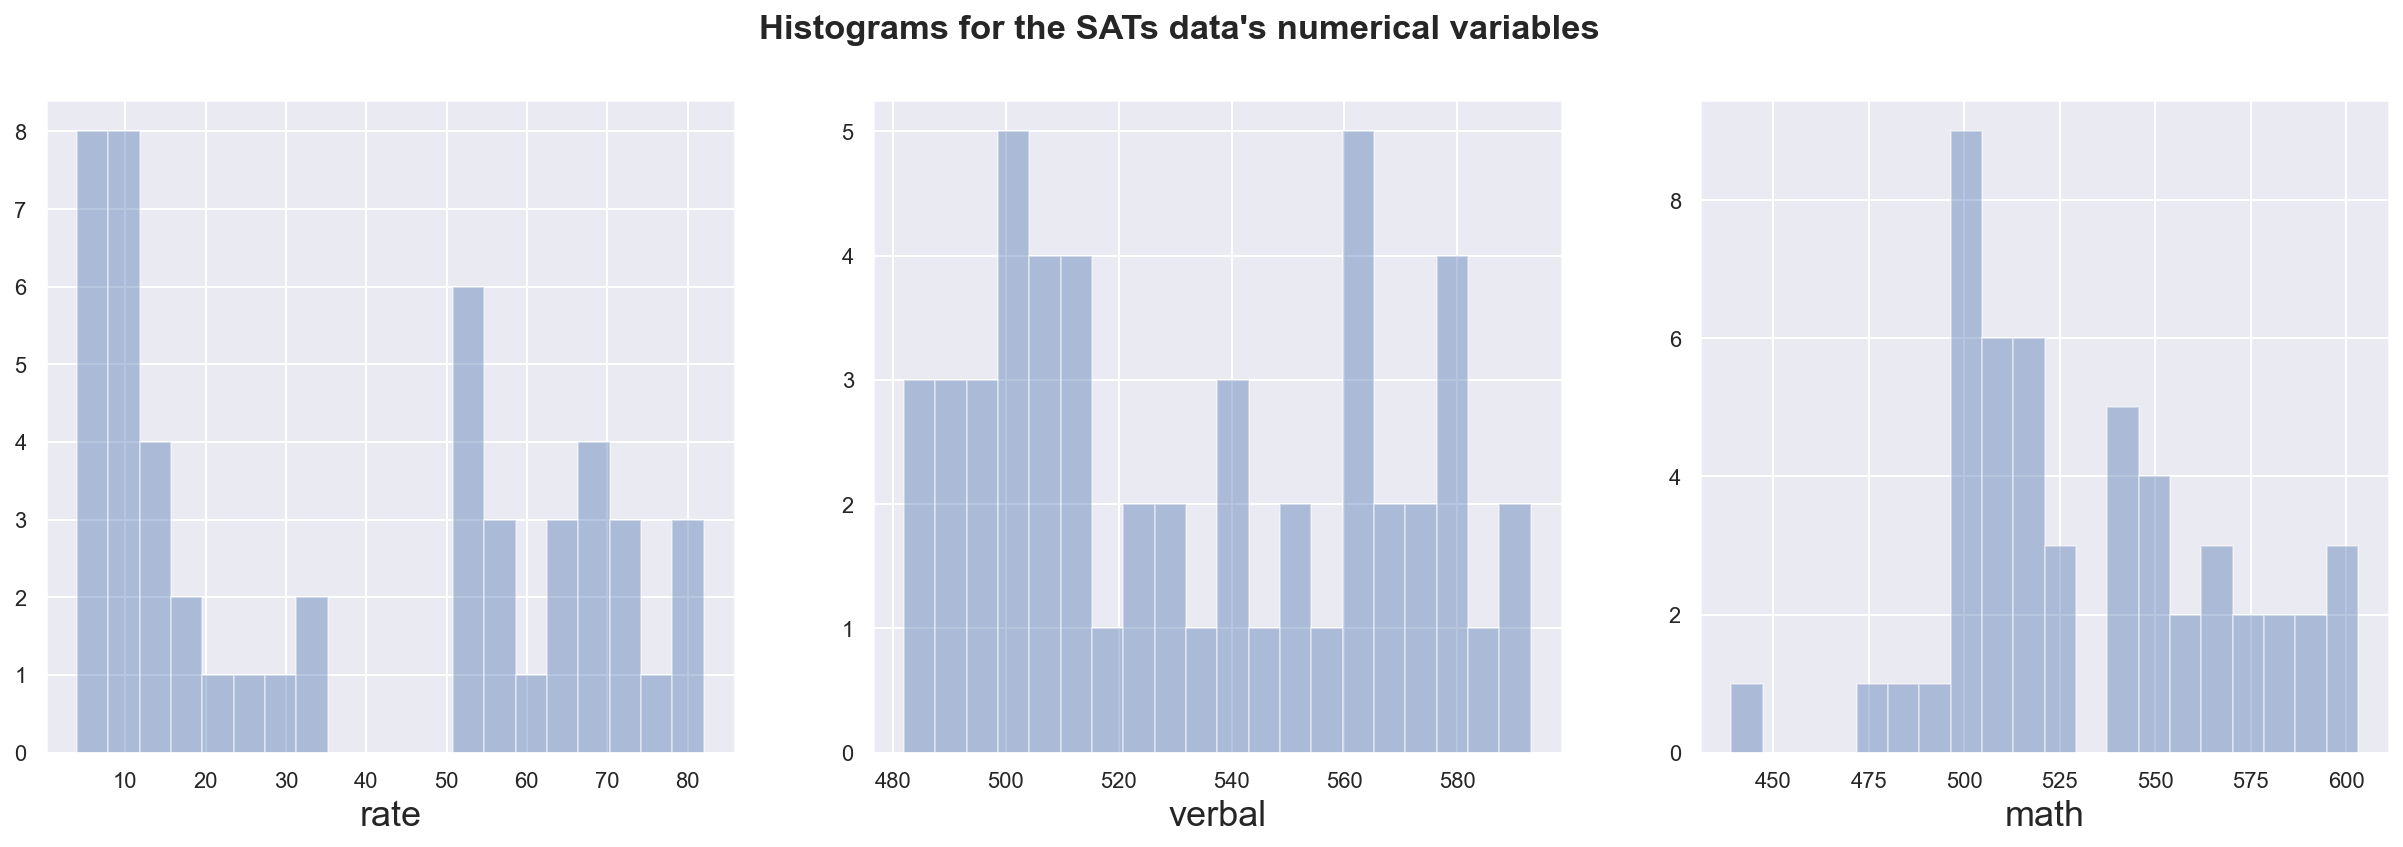

In [310]:
# setting label sizes
sns.set(rc = {'axes.labelsize' : 18 })

# generating fig, axes
fig, ax = plt.subplots(1,3, figsize=[21,6])

# setting fig title
fig.suptitle("Histograms for the SATs data's numerical variables" ,
               fontsize = 'x-large' , 
               fontweight = 'bold' );

# generating histograms
plot_num = 0
for col in sat.columns[1:]:
    sns.distplot(sat[col],ax=ax[plot_num],bins=20,kde=False)
    plot_num +=1    

### 3.2 Using seaborn's `pairplot`, show the joint distributions for each of `Rate`, `Math`, and `Verbal`

Explain what the visualization tells you about your data.

[Please read over the `pairplot` documentation to fine-tune your chart.](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.pairplot.html#seaborn.pairplot)

In [311]:
# importing additional data so pairplot values may be colour coded by US state region
census = pd.read_csv("/Users/lewis/Desktop/GA/DSI25-lessons/projects/project-2/us census bureau regions and divisions.csv")

# cleaning column names
census.columns = ['state name', 'state', 'region', 'division']

# joining new data to sat
sat = sat.merge(right = census, how = 'inner', on = 'state')

# adding new columns to the sat_data_dictionary
sat_data_dictionary['state name'] = "(str) The state's full name."
sat_data_dictionary['region'] = "(str) The region where the state is located."
sat_data_dictionary['division'] = "(str) The division where the state is located."



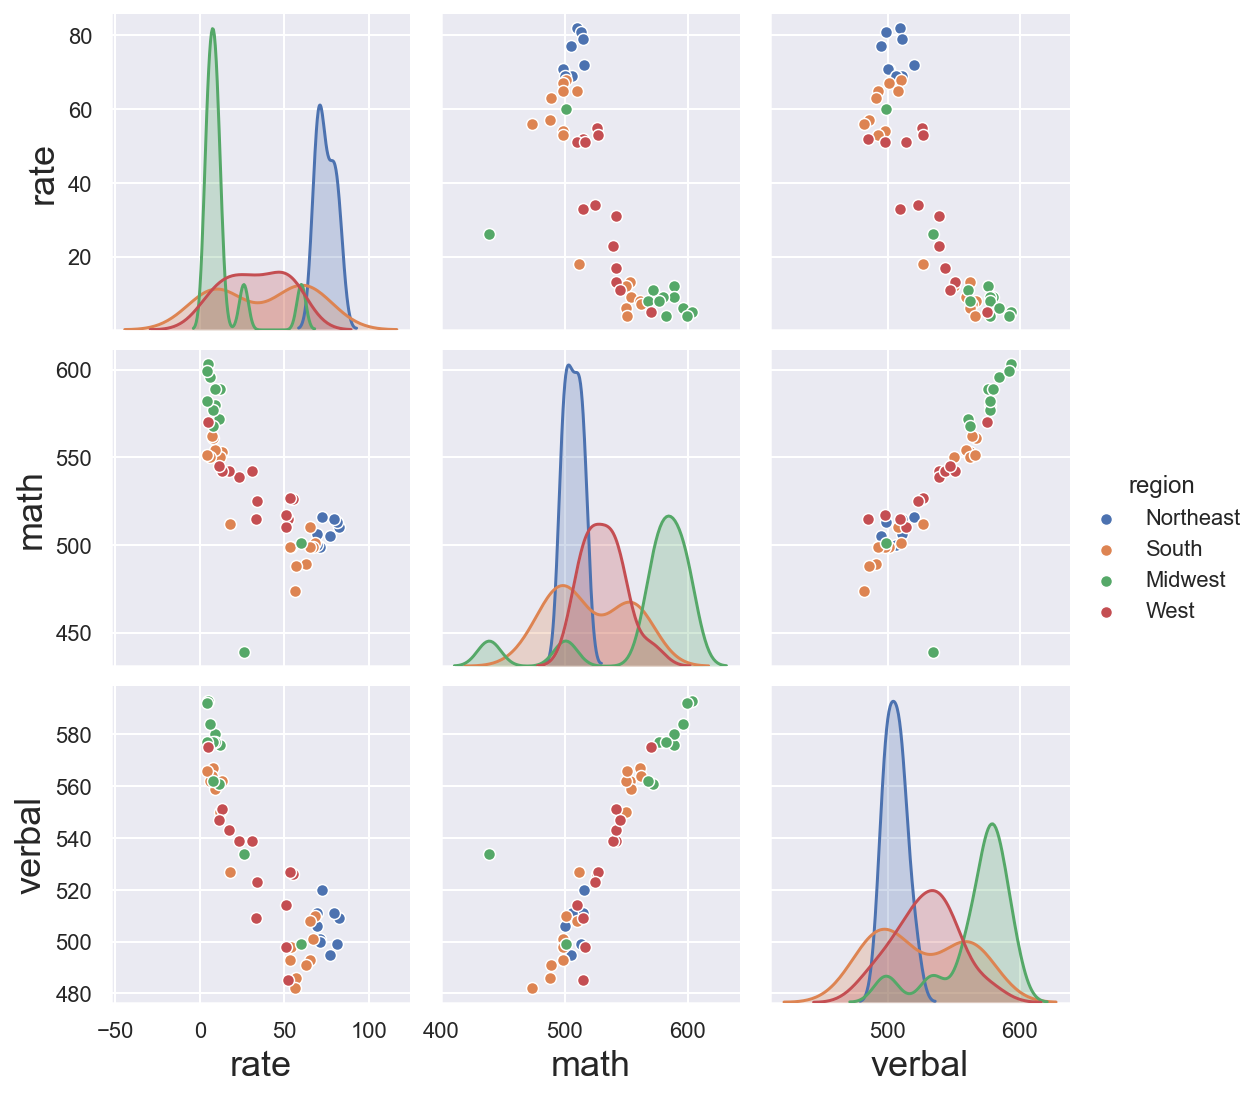

In [312]:
# Using seaborn's pairplot, show the joint distributions for each of Rate, Math, and Verbal
sns.pairplot(
    sat,
    vars = ['rate','math','verbal'],
    kind='scatter', 
    hue='region',
)

**Q:** Explain what the visualization tells you about your data.

**A:**
The pairplot shows:
* Along the diagonal: Kernel density estimates for each region, for each of the 3 variables.
    * The rate KDE shows that in the Midwest, it is typical for fewer than 20% students to sit the SATs. The distribution of rate in the Midwestern states is roughly normally distributed, however two Midwestern states are outliers, with participation rates of approx. 25-30% and  60%. In the North East, it is common for states to have a participation rate of ~70-80% (rougly normally distributed). The rate of students sitting the SATs varys more widely amongst states in both the South (<10%-70%) and the West (<10% - approx.55%). The distribution of rate in the South is roughly binomial, whereas in the West it is roughly normal.
    * The math and verbal KDEs show that the average score on the math and verbal components of the SAT's is highest in the Midwest and lowest in the Northeast. Whilst the distributions of scores for the Northeast, West and Midwest are fairly normal, the Midwest has two outliers (the scatter graphs indicate these are the two Midwestern states with higher participation rates. As with rate, the Southern state's distribution for scores on the math and verbal components are roughly binomial.
* Top centre, top left: Scatter plots, plotting rate against math and rate against verbal, respectively.
    * These plots indicate that rate is negatively correlated with math and verbal. This suggests that in states where few students particiapte (e.g. the majority of the Midwest), only the highest ability students sit the SATs. One outlier from this trend is the Midwestern state where ~25-30% of students sit the SATs, but the average math score is lower than any other state. 
    * Both plots show that the binomial distribution of the participation rate of Southern states is also reflected in their math and verbal scores. Specifically, the average math and verbal scores tend to be higher for states where fewer students participate, than for those where more do.
    * Interestingly, although Northeastern states have higher participation rates (~70%+) than high-rate Southern states (~50%+), they tend to have moderately higher average scores for math and verbal. Whilst this effect is only minor, it could be enough to suggest that, in a regession analysis, it may be more appropriate to fit the data with a 2nd degree polynomial than with a straight line.
* Middle right: Scatter plot, plotting math against verbal.
    * This plot shows that there is a strong positive correlation between a state's math and verbal scores. This is to be expected, as in general, students with a high abiliity level on one, will tend to have a high ability level on the other. Again, there is an outlier - the Midwestern state with <450 math. Given how far this state is from the general trend, it would be worth investigating whether it's value for math is correct, or the result of a data entry error.
* Middle left, bottom left, bottom centre.
    * These plots are transpositions of other plots discussed above.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 4. Plot the data using built-in pandas functions.

---

Pandas is very powerful and contains a variety of nice, built-in plotting functions for your data. Read the documentation here to understand the capabilities:

http://pandas.pydata.org/pandas-docs/stable/visualization.html

### 4.1 Plot a stacked histogram with `Verbal` and `Math` using pandas

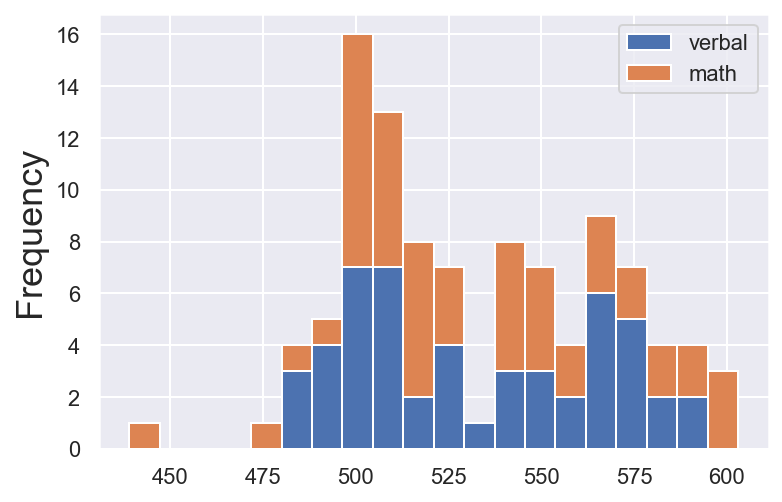

In [313]:
sat[['verbal','math']].plot(kind='hist', bins=20, stacked =True);

# TO DO: add title and axis labels

### 4.2 Plot `Verbal` and `Math` on the same chart using boxplots

What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

What's wrong with plotting a box-plot of `Rate` on the same chart as `Math` and `Verbal`?

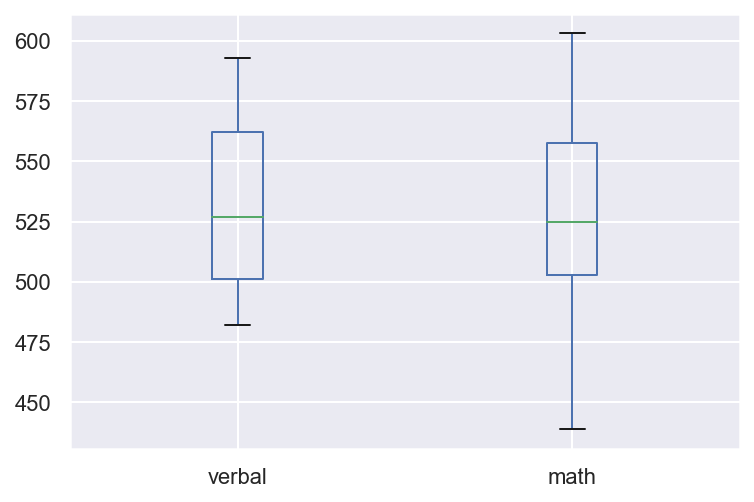

In [314]:
sat[['verbal','math']].plot(kind='box');

"""
TO DO:

figure out how to add title & axis labels

stacked_hist.xlabel="SAT component"
stacked_hist.ylabel="Average state score"
""";


**Q:** What are the benefits of using a boxplot as compared to a scatterplot or a histogram?

**A:** Both histograms and box plots show the distribution of the dataset. The advantage of a box plot is that is also 
shows the quartiles of the dataset and any outliers (defined as values beyond 1.5 x IQR or -1.5 x IQR.

**Q:** What's wrong with plotting a box-plot of Rate on the same chart as Math and Verbal?

**A:** Rate shouldn't be plotted on the same box-plot as math and verbal, it is on a differnet scale and will 
be difficult to interpret. Specifically, values for rate have the potential to range between 0-100 (as it 
is a percentage), whereas SAT component scores (i.e. math and verbal) have the potential to range between 
200-800. The ranges of the actual values in the data set are smaller.

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 4.3 Plot `Verbal`, `Math`, and `Rate` appropriately on the same boxplot chart

Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart. You should strive to make the chart as intuitive as possible. 


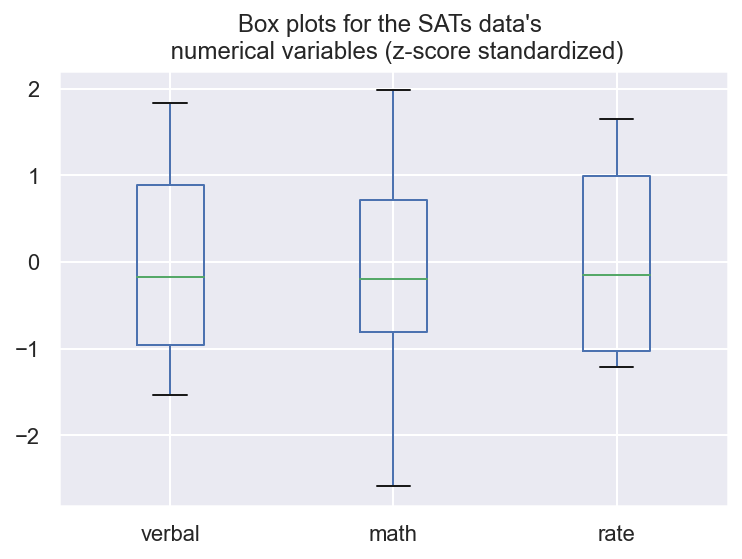

In [315]:
# z-score scaling the data
sats_zscaled = pd.DataFrame(stats.zscore(sat[['verbal','math','rate']]))

# adding column names to sats_zscaled
sats_zscaled.columns = ['verbal','math','rate']

# plotting sats_zscaled
sats_zscaled.plot(kind='box', title = "Box plots for the SATs data's \n numerical variables (z-score standardized)");

**Q:** Think about how you might change the variables so that they would make sense on the same chart. Explain your rationale for the choices on the chart.

**A:** I have scaled the data using z-score standardization. This sets the mean of each variable to 0 and the standard deviation to 1. Although this does not show the true scale of the data, it does ensure that all variables are on the same scale, allowing for easy and intuitive comparison of their distributions, medians, quartiles and outliers (of which there are none).

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 5. Create and examine subsets of the data

---

For these questions you will practice **masking** in pandas. Masking uses conditional statements to select portions of your DataFrame (through boolean operations under the hood.)

Remember the distinction between DataFrame indexing functions in pandas:

    .iloc[row, col] : row and column are specified by index, which are integers
    .loc[row, col]  : row and column are specified by string "labels" (boolean arrays are allowed; useful for rows)
    .ix[row, col]   : row and column indexers can be a mix of labels and integer indices
    
For detailed reference and tutorial make sure to read over the pandas documentation:

http://pandas.pydata.org/pandas-docs/stable/indexing.html



### 5.1 Find the list of states that have `Verbal` scores greater than the average of `Verbal` scores across states

How many states are above the mean? What does this tell you about the distribution of `Verbal` scores?




In [316]:
print(f"There are {len(sat[sat.verbal > np.mean(sat.verbal)])} states with verbal scores above the mean ({round(np.mean(sat.verbal),2)}).")
sat[sat.verbal > np.mean(sat.verbal)].head()

There are 24 states with verbal scores above the mean (532.53).


,state,rate,verbal,math,state name,region,division
26,CO,31,539,542,Colorado,West,Mountain
27,OH,26,534,439,Ohio,Midwest,East North Central
28,MT,23,539,539,Montana,West,Mountain
30,ID,17,543,542,Idaho,West,Mountain
31,TN,13,562,553,Tennessee,South,East South Central


**Q:** What does this tell you about the distribution of Verbal scores?

**A:** Fewer than half the states have a verbal score above the mean. This indicates that the data are right/positively skewed (if only mildly)

### 5.2 Find the list of states that have `Verbal` scores greater than the median of `Verbal` scores across states

How does this compare to the list of states greater than the mean of `Verbal` scores? Why?

In [317]:
print(f"There are {len(sat[sat.verbal > np.median(sat.verbal)])} states with verbal scores above the median ({np.median(sat.verbal)}).")
sat[sat.verbal > np.median(sat.verbal)].head()

There are 24 states with verbal scores above the median (527.0).


,state,rate,verbal,math,state name,region,division
26,CO,31,539,542,Colorado,West,Mountain
27,OH,26,534,439,Ohio,Midwest,East North Central
28,MT,23,539,539,Montana,West,Mountain
30,ID,17,543,542,Idaho,West,Mountain
31,TN,13,562,553,Tennessee,South,East South Central


**Q:** How does this compare to the list of states greater than the mean of Verbal scores? Why?

**A:** This list is identical to the previous list. This is because 24 verbal scores are above the median, 2 sit on the median and 25 are below the median.

### 5.3 Create a column that is the difference between the `Verbal` and `Math` scores

Specifically, this should be `Verbal - Math`.

In [318]:
sat['verbal_math_diff'] = sat['verbal'].subtract(sat['math'])
sat.head()

,state,rate,verbal,math,state name,region,division,verbal_math_diff
0,CT,82,509,510,Connecticut,Northeast,New England,-1
1,NJ,81,499,513,New Jersey,Northeast,Middle Atlantic,-14
2,MA,79,511,515,Massachusetts,Northeast,New England,-4
3,NY,77,495,505,New York,Northeast,Middle Atlantic,-10
4,NH,72,520,516,New Hampshire,Northeast,New England,4


### 5.4 Create two new DataFrames showing states with the greatest difference between scores

1. Your first DataFrame should be the 10 states with the greatest gap between `Verbal` and `Math` scores where `Verbal` is greater than `Math`. It should be sorted appropriately to show the ranking of states.
2. Your second DataFrame will be the inverse: states with the greatest gap between `Verbal` and `Math` such that `Math` is greater than `Verbal`. Again, this should be sorted appropriately to show rank.
3. Print the header of both variables, only showing the top 3 states in each.

In [319]:
# 10 states with the greatest gap between Verbal and Math scores where Verbal is greater than Math
sat[sat['verbal'] > sat['math']].sort_values('verbal_math_diff', ascending = False).head(10)

,state,rate,verbal,math,state name,region,division,verbal_math_diff
27,OH,26,534,439,Ohio,Midwest,East North Central,95
29,WV,18,527,512,West Virginia,South,South Atlantic,15
50,MS,4,566,551,Mississippi,South,East South Central,15
45,AR,6,562,550,Arkansas,South,West South Central,12
31,TN,13,562,553,Tennessee,South,East South Central,9
9,VA,68,510,501,Virginia,South,South Atlantic,9
32,NM,13,551,542,New Mexico,West,Mountain,9
16,DC,56,482,474,District of Columbia,South,South Atlantic,8
41,OK,8,567,561,Oklahoma,South,West South Central,6
8,ME,69,506,500,Maine,Northeast,New England,6


In [320]:
# states with the greatest gap between Verbal and Math such that Math is greater than Verbal
sat[sat['verbal'] < sat['math']].sort_values('verbal_math_diff').head(10)

,state,rate,verbal,math,state name,region,division,verbal_math_diff
21,HI,52,485,515,Hawaii,West,Pacific,-30
23,CA,51,498,517,California,West,Pacific,-19
1,NJ,81,499,513,New Jersey,Northeast,Middle Atlantic,-14
33,IL,12,576,589,Illinois,Midwest,East North Central,-13
44,WI,6,584,596,Wisconsin,Midwest,East North Central,-12
36,MI,11,561,572,Michigan,Midwest,East North Central,-11
47,IA,5,593,603,Iowa,Midwest,West North Central,-10
3,NY,77,495,505,New York,Northeast,Middle Atlantic,-10
37,MN,9,580,589,Minnesota,Midwest,West North Central,-9
49,ND,4,592,599,North Dakota,Midwest,West North Central,-7


In [321]:
# Print the header of both variables, only showing the top 3 states in each.
sat[sat['verbal'] > sat['math']].sort_values('verbal_math_diff', ascending = False).head(3)

,state,rate,verbal,math,state name,region,division,verbal_math_diff
27,OH,26,534,439,Ohio,Midwest,East North Central,95
29,WV,18,527,512,West Virginia,South,South Atlantic,15
50,MS,4,566,551,Mississippi,South,East South Central,15


In [322]:
# Print the header of both variables, only showing the top 3 states in each.
sat[sat['verbal'] < sat['math']].sort_values('verbal_math_diff').head(3)

,state,rate,verbal,math,state name,region,division,verbal_math_diff
21,HI,52,485,515,Hawaii,West,Pacific,-30
23,CA,51,498,517,California,West,Pacific,-19
1,NJ,81,499,513,New Jersey,Northeast,Middle Atlantic,-14


## 6. Examine summary statistics

---

Checking the summary statistics for data is an essential step in the EDA process!

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.1 Create the correlation matrix of your variables (excluding `State`).

What does the correlation matrix tell you?


In [323]:
sat.corr()

,rate,verbal,math,verbal_math_diff
rate,1.000000,-0.888121,-0.773419,-0.098671
verbal,-0.888121,1.000000,0.899909,0.044527
math,-0.773419,0.899909,1.000000,-0.395574
verbal_math_diff,-0.098671,0.044527,-0.395574,1.000000


**Q:** What does the correlation matrix tell you?

**A:** 

The correlation matrix shows: 
* A strong negative correlation between rate and verbal, and between rate and math. This indicates that states with high participation rates tend to have lower verbal and math scores.
* Rate has a negilibly small negative correlation with verbal_math_diff. This tells us there is likely no relationship between rate and verbal_math_diff.
* There is a strong positive correlation between varbal and math. This indicates that states with high verbal scores typically tend to have high math scores (and vice versa).
* A negilibly small positive correlation between verbal and verbal_math_diff. This tells us there is likely no relationship between verbal and verbal_math_diff.
* a moderate negative correlation between math and verbal_math_diff. This tells us that as a state's math score increases, so does it's tendancy to perform better on math than on verbal. However, this effect is smaller than the correlation between math and verbal.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.2 Use pandas'  `.describe()` built-in function on your DataFrame

Write up what each of the rows returned by the function indicate.

In [324]:
sat.describe()

,rate,verbal,math,verbal_math_diff
count,51.000000,51.000000,51.000000,51.000000
mean,37.000000,532.529412,531.843137,0.686275
std,27.550681,33.360667,36.287393,15.839811
min,4.000000,482.000000,439.000000,-30.000000
25%,9.000000,501.000000,503.000000,-6.000000
50%,33.000000,527.000000,525.000000,0.000000
75%,64.000000,562.000000,557.500000,4.500000
max,82.000000,593.000000,603.000000,95.000000


**Q:** Write up what each of the rows returned by the function indicate.

**A:**
* count - the count for each column. This shows that there are 51 values in the dataset and that none of the columns have missing values. 
* mean - the mean for each column. The similar values for verbal and math and very small value for verbal_math_diff indicates that the mean verbal and math scores are similar.
* std - the standard deviation for each column. The std for rate is 27. The std for verbal and math are 33 and 36, respectively, indicating the state's math scores are more widely distributed thatn their verbal scores. The std for verbal_math_diff is 15.
* min - the minimum value for each column. Minimum rate is 4. Minimum verbal and math scores are 482 and 439 respectively (this large gap probabaly partially accounts for math's larger std). The minimum verbal_math_diff is -30.
* 25% - the 1st quartile/25% percentile for each column. This shows threshold for each variable which 75% of the values are above.
* 50% - the median/2nd quartile/50% percentile for each column. For each variable, this shows the middle value and the threshold which 50% of the values are above.
* 75% - the 3rd quartile/75% percentile for each column. For each variable, this shows the threshold which 25% of the values are above.
* max - the maximum value recorded for each column. Earlier, I speculated that Ohio's math score may be a result of a data entry error. The max verbal_math_diff value (which is Ohio's) further highlights the irregularity of this value as it is well beyond 3 stds of the mean (athough Ohio's math value itself is just within 3 stds of the math mean). 

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 6.3 Assign and print the _covariance_ matrix for the dataset

1. Describe how the covariance matrix is different from the correlation matrix.
2. What is the process to convert the covariance into the correlation?
3. Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

In [325]:
sat.cov()

,rate,verbal,math,verbal_math_diff
rate,759.04,-816.280000,-773.220000,-43.060000
verbal,-816.28,1112.934118,1089.404706,23.529412
math,-773.22,1089.404706,1316.774902,-227.370196
verbal_math_diff,-43.06,23.529412,-227.370196,250.899608


**Q:** What is the process to convert the covariance into the correlation?

**A:**

**Q:** Why is the correlation matrix preferred to the covariance matrix for examining relationships in your data?

**A:** The values in the covariance matrix tell us whether the values being compared are negatively or positively associated, but not by how much. Each value in the covariance matrix is on a different scale, making them extremely difficult to compare. The values in the correlation matrix are scaled to between -1 and 1. This makes it easier to understand the nature of the relationship between the two values. It also makes it possible to compare between correlations.

<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 7. Performing EDA on "drug use by age" data.

---

You will now switch datasets to one with many more variables. This section of the project is more open-ended - use the techniques you practiced above!

We'll work with the "drug-use-by-age.csv" data, sourced from and described here: https://github.com/fivethirtyeight/data/tree/master/drug-use-by-age.

### 7.1 Load the data using pandas. 

Does this data require cleaning? Are variables missing? How will this affect your approach to EDA on the data?

In [326]:
drugs = "/Users/lewis/Desktop/GA/DSI25-lessons/projects/project-2/drug-use-by-age.csv"

drugs = pd.read_csv(drugs)

In [327]:
# replacing - for _ in column names
col_names = drugs.columns
col_names_cleaned = []
for col in col_names:
    col_names_cleaned.append(col.replace('-','_'))
drugs.columns = col_names_cleaned

In [328]:
drugs.dtypes

age                         object
n                            int64
alcohol_use                float64
alcohol_frequency          float64
marijuana_use              float64
marijuana_frequency        float64
cocaine_use                float64
cocaine_frequency           object
crack_use                  float64
crack_frequency             object
heroin_use                 float64
heroin_frequency            object
hallucinogen_use           float64
hallucinogen_frequency     float64
inhalant_use               float64
inhalant_frequency          object
pain_releiver_use          float64
pain_releiver_frequency    float64
oxycontin_use              float64
oxycontin_frequency         object
tranquilizer_use           float64
tranquilizer_frequency     float64
stimulant_use              float64
stimulant_frequency        float64
meth_use                   float64
meth_frequency              object
sedative_use               float64
sedative_frequency         float64
dtype: object

Several columns are encoded as string/object type, which should be either ints or floats. Specifically, the age column is encoded as a string/object type as it has values meant to express a range (e.g. 22-23). I will replace these ranges with their median age. The other rows encoded as string/object type include missing values represented by a hyphen. I will replace these with NaNs and cast the columns to floats.

In [329]:
# cleaning age
age_col = drugs.age
cur_col = 10
for age in list(age_col[10:16]):
    age_col[cur_col] = (np.median([int(age[:2]),int(age[-2:])]))
    cur_col +=1
age_col[16] = 65
drugs.age = age_col
drugs.age

<ipython-input-329-6b72ca424ad5>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_col[cur_col] = (np.median([int(age[:2]),int(age[-2:])]))
<ipython-input-329-6b72ca424ad5>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age_col[16] = 65


0       12
1       13
2       14
3       15
4       16
5       17
6       18
7       19
8       20
9       21
10    22.5
11    24.5
12    27.5
13      32
14      42
15      57
16      65
Name: age, dtype: object

In [330]:
# replacing hyphens with NaNs 
drugs.replace('-',np.nan,inplace=True)
drugs.isna().sum()

age                        0
n                          0
alcohol_use                0
alcohol_frequency          0
marijuana_use              0
marijuana_frequency        0
cocaine_use                0
cocaine_frequency          1
crack_use                  0
crack_frequency            3
heroin_use                 0
heroin_frequency           1
hallucinogen_use           0
hallucinogen_frequency     0
inhalant_use               0
inhalant_frequency         1
pain_releiver_use          0
pain_releiver_frequency    0
oxycontin_use              0
oxycontin_frequency        1
tranquilizer_use           0
tranquilizer_frequency     0
stimulant_use              0
stimulant_frequency        0
meth_use                   0
meth_frequency             2
sedative_use               0
sedative_frequency         0
dtype: int64

In [331]:
# updating dtypes
drugs = drugs.astype({'age':float,
                      "cocaine_frequency":float,
                      "crack_frequency":float,
                      "heroin_frequency":float,
                      "inhalant_frequency":float,
                      "oxycontin_frequency":float,
                      "meth_frequency":float
                     })
drugs.dtypes

age                        float64
n                            int64
alcohol_use                float64
alcohol_frequency          float64
marijuana_use              float64
marijuana_frequency        float64
cocaine_use                float64
cocaine_frequency          float64
crack_use                  float64
crack_frequency            float64
heroin_use                 float64
heroin_frequency           float64
hallucinogen_use           float64
hallucinogen_frequency     float64
inhalant_use               float64
inhalant_frequency         float64
pain_releiver_use          float64
pain_releiver_frequency    float64
oxycontin_use              float64
oxycontin_frequency        float64
tranquilizer_use           float64
tranquilizer_frequency     float64
stimulant_use              float64
stimulant_frequency        float64
meth_use                   float64
meth_frequency             float64
sedative_use               float64
sedative_frequency         float64
dtype: object

### 7.2 Do a high-level, initial overview of the data

Get a feel for what this dataset is all about.

Use whichever techniques you'd like, including those from the SAT dataset EDA. The final response to this question should be a written description of what you infer about the dataset.

Some things to consider doing:

- Look for relationships between variables and subsets of those variables' values
- Derive new features from the ones available to help your analysis
- Visualize everything!

### 7.3 Create a testable hypothesis about this data

Requirements for the question:

1. Write a specific question you would like to answer with the data (that can be accomplished with EDA).
2. Write a description of the "deliverables": what will you report after testing/examining your hypothesis?
3. Use EDA techniques of your choice, numeric and/or visual, to look into your question.
4. Write up your report on what you have found regarding the hypothesis about the data you came up with.


Your hypothesis could be on:

- Difference of group means
- Correlations between variables
- Anything else you think is interesting, testable, and meaningful!

**Important notes:**

You should be only doing EDA _relevant to your question_ here. It is easy to go down rabbit holes trying to look at every facet of your data, and so we want you to get in the practice of specifying a hypothesis you are interested in first and scoping your work to specifically answer that question.

Some of you may want to jump ahead to "modeling" data to answer your question. This is a topic addressed in the next project and **you should not do this for this project.** We specifically want you to not do modeling to emphasize the importance of performing EDA _before_ you jump to statistical analysis.

** Question and deliverables**


...

In [121]:
# Code

**Report**



...

<img src="http://imgur.com/xDpSobf.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 8. Introduction to dealing with outliers

---

Outliers are an interesting problem in statistics, in that there is not an agreed upon best way to define them. Subjectivity in selecting and analyzing data is a problem that will recur throughout the course.

1. Pull out the rate variable from the sat dataset.
2. Are there outliers in the dataset? Define, in words, how you _numerically define outliers._
3. Print out the outliers in the dataset.
4. Remove the outliers from the dataset.
5. Compare the mean, median, and standard deviation of the "cleaned" data without outliers to the original. What is different about them and why?

In [338]:
sat.rate

0     82
1     81
2     79
3     77
4     72
5     71
6     71
7     69
8     69
9     68
10    67
11    65
12    65
13    63
14    60
15    57
16    56
17    55
18    54
19    53
20    53
21    52
22    51
23    51
24    34
25    33
26    31
27    26
28    23
29    18
30    17
31    13
32    13
33    12
34    12
35    11
36    11
37     9
38     9
39     9
40     8
41     8
42     8
43     7
44     6
45     6
46     5
47     5
48     4
49     4
50     4
Name: rate, dtype: int64

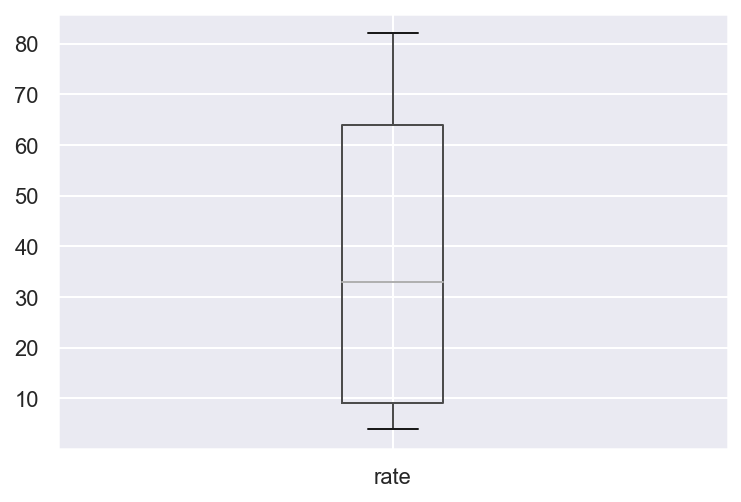

In [342]:
sat.boxplot(column = 'rate');

There are no outliers, where outliers are defined as values < IQR * 1.5 or > IQR * 1.5 

In [346]:
sat_std = sat.rate.describe().loc['std']
sat_mean = sat.rate.describe().loc['mean']

for val in sat.rate:
    if val > (sat_mean + (sat_std*3)):
        print(val)
    elif val < (sat_mean - (sat_std*3)):
        print(val)

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

### 9. Percentile scoring and Spearman rank correlation

---

### 9.1 Calculate the Spearman correlation of sat `Verbal` and `Math`

1. How does the Spearman correlation compare to the Pearson correlation? 
2. Describe clearly in words the process of calculating the Spearman rank correlation.
  - Hint: the word "rank" is in the name of the process for a reason!


In [349]:
sat[['verbal','math']].corr()

,verbal,math
verbal,1.000000,0.899909
math,0.899909,1.000000


In [348]:
sat[['verbal','math']].corr(method='spearman')

,verbal,math
verbal,1.000000,0.909413
math,0.909413,1.000000


**Q:** How does the Spearman correlation compare to the Pearson correlation?

**A:**
    
**Q:** Describe clearly in words the process of calculating the Spearman rank correlation.

**A:**

### 9.2 Percentile scoring

Look up percentile scoring of data. In other words, the conversion of numeric data to their equivalent percentile scores.

http://docs.scipy.org/doc/numpy-dev/reference/generated/numpy.percentile.html

http://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.percentileofscore.html

1. Convert `Rate` to percentiles in the sat scores as a new column.
2. Show the percentile of California in `Rate`.
3. How is percentile related to the Spearman rank correlation?

### 9.3 Percentiles and outliers

1. Why might percentile scoring be useful for dealing with outliers?
2. Plot the distribution of a variable of your choice from the drug use dataset.
3. Plot the same variable but percentile scored.
4. Describe the effect, visually, of converting raw scores to percentile.